#Cargar las liberías y el csv, crear un dataframe de pandas a partir del csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
eje1= 'eje1.csv'
df=pd.read_csv(eje1)
df

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO
0,1,informatica,2,soltero,20,si
1,2,papelaria,3,casado,32,no
2,3,informatica,4,separado,24,no
3,4,papelaria,2,soltero,43,si
4,5,administracion,2,separado,46,si
5,6,NaN,3,divorciado,54,no
6,7,papelaria,2,NaN,27,no
7,8,hosteleria,3,casado,42,si
8,9,informatica,2,separado,45,si
9,10,NaN,2,casado,61,si


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           20 non-null     int64 
 1   FP           17 non-null     object
 2   EXPERIENCIA  20 non-null     int64 
 3   ESTADOCIVIL  17 non-null     object
 4   EDAD         20 non-null     int64 
 5   AUTONOMO     20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


#Contar nulos

In [ ]:
df.isnull().sum()

ID             0
FP             3
EXPERIENCIA    0
ESTADOCIVIL    3
EDAD           0
AUTONOMO       0
dtype: int64

In [ ]:
df.fillna(0)

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO
0,1,informatica,2,soltero,20,si
1,2,papelaria,3,casado,32,no
2,3,informatica,4,separado,24,no
3,4,papelaria,2,soltero,43,si
4,5,administracion,2,separado,46,si
5,6,0,3,divorciado,54,no
6,7,papelaria,2,0,27,no
7,8,hosteleria,3,casado,42,si
8,9,informatica,2,separado,45,si
9,10,0,2,casado,61,si


#Pasar a categórica y a codes



In [ ]:
df['FP']=pd.Categorical(df['FP'])
df['ESTADOCIVIL']=pd.Categorical(df['ESTADOCIVIL'])
df['AUTONOMO']=pd.Categorical(df['AUTONOMO'])

In [ ]:
df['FP']=df['FP'].cat.codes
df['ESTADOCIVIL']=df['ESTADOCIVIL'].cat.codes
df['AUTONOMO']=df['AUTONOMO'].cat.codes

#Dummies para columnas booleanas

In [ ]:
#sexo_dummy= pd.get_dummies(df['AUTONOMO'], prefix="AUTONOMO")
#df= pd.concat([df,sexo_dummy], axis=1)
#df= df.drop(['AUTONOMO'], axis=1)

In [ ]:
df

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO
0,1,2,2,3,20,1
1,2,3,3,0,32,0
2,3,2,4,2,24,0
3,4,3,2,3,43,1
4,5,0,2,2,46,1
5,6,-1,3,1,54,0
6,7,3,2,-1,27,0
7,8,1,3,0,42,1
8,9,2,2,2,45,1
9,10,-1,2,0,61,1


#Dividir dataframe en X e Y

In [ ]:
X=df.drop(['AUTONOMO'],axis=1)
Y=df['AUTONOMO']

In [ ]:
X

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD
0,1,2,2,3,20
1,2,3,3,0,32
2,3,2,4,2,24
3,4,3,2,3,43
4,5,0,2,2,46
5,6,-1,3,1,54
6,7,3,2,-1,27
7,8,1,3,0,42
8,9,2,2,2,45
9,10,-1,2,0,61


In [ ]:
Y

0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    0
Name: AUTONOMO, dtype: int8

#Histograma

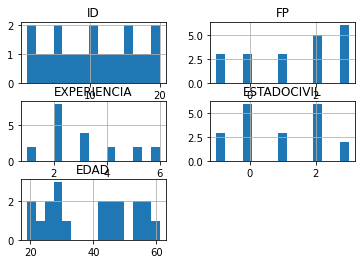

In [ ]:
hist=X.hist(bins=15)

#Test de Shapiro

In [ ]:
from scipy.stats import shapiro
for columna_numerica  in X.columns:
    stat, p = shapiro(X[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.960, p-value=0.551
La variable  ID  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.868, p-value=0.011
La variable  FP  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.874, p-value=0.014
La variable  EXPERIENCIA  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.902, p-value=0.045
La variable  ESTADOCIVIL  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.922, p-value=0.109
La variable  EDAD  proviene de una distribución normal (no rechazamos H0) 



#Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)

#Division en train y test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.2,random_state=0)

#Regresión lineal, Validación Cruzada y predecir un valor

In [ ]:
from sklearn import linear_model

In [ ]:
#Creo un modelo de regresión lineal
modelo=linear_model.LinearRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={"n_jobs":[-1,0,1,2]}
grid= GridSearchCV(estimator=modelo,param_grid=parameters,cv=3)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [-1, 0, 1, 2]})

In [ ]:
X_test

array([[ 1.47408695, -0.28005602, -1.34839972,  0.07930516, -1.00945972],
       [-1.47408695,  1.12022407,  0.        , -0.71374643, -0.55234588],
       [ 1.64750894,  1.12022407, -1.34839972, -0.71374643, -0.85708844],
       [-0.26013299,  0.42008403, -0.67419986,  0.87235674,  0.43806743]])

In [ ]:
Y_test_pred=grid.predict(X_test)

In [ ]:
Y_test_pred

array([1.52667102, 0.29549275, 1.46252094, 1.00176186])

#Matriz de confusión

In [ ]:
import sklearn.metrics as metrics

In [ ]:
umbral=0.5
y_umbralizadas=1*(Y_test[:]>umbral)

In [ ]:
y_umbralizadas

18    1
1     0
19    0
8     1
Name: AUTONOMO, dtype: int64

In [ ]:
print(u"Matriz de confusión\n",metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[2 0]
 [0 2]]


In [ ]:
xc=np.linspace(4,8,5).reshape(1,5)
Y1=grid.predict(xc)

In [ ]:
Y1

array([-0.0901931])

In [ ]:
ppr=np.array([10,12,13,4,12])
Y11=grid.predict(ppr.reshape(1,5))

In [ ]:
Y11

array([-2.14381846])

#KNN VECINOS

In [ ]:
from sklearn.neighbors import  KNeighborsRegressor

In [ ]:
model1=KNeighborsRegressor()
params={'n_neighbors': range(1,20)}

In [ ]:
modelgs=GridSearchCV(model1,params,cv=3)

In [ ]:
modelgs.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 10, n_

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

In [ ]:
xc=np.linspace(4,8,5).reshape(1,5)
Y1=modelgs.predict(xc)

In [ ]:
Y1

array([0.57142857])

In [ ]:
xc1=np.array([10,12,13,4,12])
Y11=modelgs.predict(xc1.reshape(1,5))

In [ ]:
Y11

array([0.57142857])

#Arbol de decisión


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=3)


In [ ]:
Y_train_pred = regr_opt.predict(X_train)
Y_test_pred = regr_opt.predict(X_test)

In [ ]:
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, Y_train_pred),10)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, Y_test_pred),10)))

La R^2 en los datos de train es: 0.8095238095
La R^2 en los datos de test es: 0.0


In [ ]:
Y_test

18    1
1     0
19    0
8     1
Name: AUTONOMO, dtype: int8

ValueError: ignored

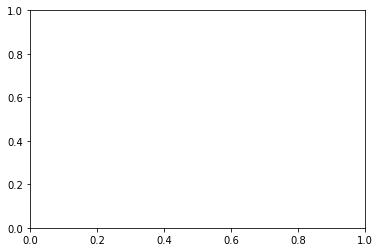

In [ ]:
plt.scatter(X_test, Y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, Y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

In [ ]:
X_test

array([[ 1.47408695, -0.28005602, -1.34839972,  0.07930516, -1.00945972],
       [-1.47408695,  1.12022407,  0.        , -0.71374643, -0.55234588],
       [ 1.64750894,  1.12022407, -1.34839972, -0.71374643, -0.85708844],
       [-0.26013299,  0.42008403, -0.67419986,  0.87235674,  0.43806743]])

In [ ]:
Y_test

18    1
1     0
19    0
8     1
Name: AUTONOMO, dtype: int8